In [134]:
# RECOPILACION DE DATOS 

# Lectura de las instancias de CVRPLIB

#A-n32-k5

# PRIMERO DEBEMOS LEER DEL ARCHIVO 

import numpy as np 
import pandas as pd 

# Nombre de la instancia 
fname = 'Augerat/A-n32-k5.vrp'

#DONDE

# A : AUTOR DE LA INSTANCIA 
# N : NÚMERO DE NODOS O CIUDADES A VISITAR
# K : NÚMERO DE VEHICULOS DISPONIBLES

# CREAMOS UNA VARIABLE LINEAS COMO LISTA PARA ALMACENAR LA DATA DE LA INSTANCIA

lineas = []

# ABRIMOS LA INSTANCIA Y RECOPILAMOS LA DATA COMO LISTA

with open (fname , 'rt') as f:
    for f_lineas in f:
        lineas.append(f_lineas)

# OBTENIENDO CAPACIDAD DE LOS VEHICULOS , DIMENSION(CANTIDAD DE NODOS) , CANTIDAD DE VEHICULOS COMO STRING

dimension_str = lineas[3]
capacidad_str = lineas[5]
vehiculos_str = lineas[0]

# CAMBIANDO EL TIPO DE STRING A INTEGER

instancia = lineas[0]

capacidad = int((capacidad_str[10:]))

nodos = int(dimension_str[12:])

vehiculos = int(vehiculos_str[14:])

clientes = nodos - 1

print(instancia)
print("La cantidad de vehiculos son de:" , vehiculos)
print("\n")
print("La capacidad de los vehiculos es de : " ,capacidad)
print("\n")
print ("La cantidad de nodos que tiene la instancia es: " , nodos)
print("\n")


extraer_coordenadas = nodos + 7


# OBTENGO LOS DATOS DE LAS COORDENADAS DE LOS NODOS EN UN ARREGLO 


data_coordenadas = lineas[7 : extraer_coordenadas]


# AHORA HAY QUE OBTENER LAS DEMANDAS DE CADA CIUDAD 

extraer_demandas = extraer_coordenadas + 1

data_demandas = lineas[extraer_demandas : extraer_demandas + nodos ]


# SEPARAR LOS DATOS DE EL ARREGLO DE COORDENADAS 

limpieza_coordenadas = []
limpieza_demandas = []


for x in data_coordenadas:
    limpieza_coordenadas.append(x.split())
    
for y in data_demandas:
    limpieza_demandas.append(y.split())
    


#CREACION DEL DATAFRAME Y ALMACENANDO LA DATA DE LIMPIEZA_COORDENADAS

print("Creacion del DATAFRAME de los nodos con sus demandas respectivas")
print("\n")
df = pd.DataFrame({
        "x" : [int(limpieza_coordenadas[x][1]) for x in range(0,nodos)],
        "y" : [int(limpieza_coordenadas[x][2]) for x in range(0,nodos)],
        "demanda" : [int(limpieza_demandas[x][1]) for x in range(0,nodos)]
})
    

print(df)    
print("\n")
    
    
# Generando los arcos o los caminos que se pueden recorrer 

print("DATAFRAME de los nodos con su distancia euclidiana")
print("\n")
df_distancias = pd.DataFrame({
    
        "nodos" : [(i,j) for i in range(0,nodos) for j in range(0,nodos) if i!=j],
        "distancia" : [np.hypot(int(limpieza_coordenadas[i][1]) - int(limpieza_coordenadas[j][1]) ,  int(limpieza_coordenadas[i][2]) -  int(limpieza_coordenadas[i][2]) ) for i in range(0, nodos) for j in range(0,nodos) if i != j]
      
})

print(df_distancias)
print("\n")















NAME : A-n32-k5

La cantidad de vehiculos son de: 5


La capacidad de los vehiculos es de :  100


La cantidad de nodos que tiene la instancia es:  32


Creacion del DATAFRAME de los nodos con sus demandas respectivas


     x   y  demanda
0   82  76        0
1   96  44       19
2   50   5       21
3   49   8        6
4   13   7       19
5   29  89        7
6   58  30       12
7   84  39       16
8   14  24        6
9    2  39       16
10   3  82        8
11   5  10       14
12  98  52       21
13  84  25       16
14  61  59        3
15   1  65       22
16  88  51       18
17  91   2       19
18  19  32        1
19  93   3       24
20  50  93        8
21  98  14       12
22   5  42        4
23  42   9        8
24  61  62       24
25   9  97       24
26  80  55        2
27  57  69       20
28  23  15       15
29  20  70        2
30  85  60       14
31  98   5        9


DATAFRAME de los nodos con su distancia euclidiana


        nodos  distancia
0      (0, 1)       14.0
1      (0, 2)  

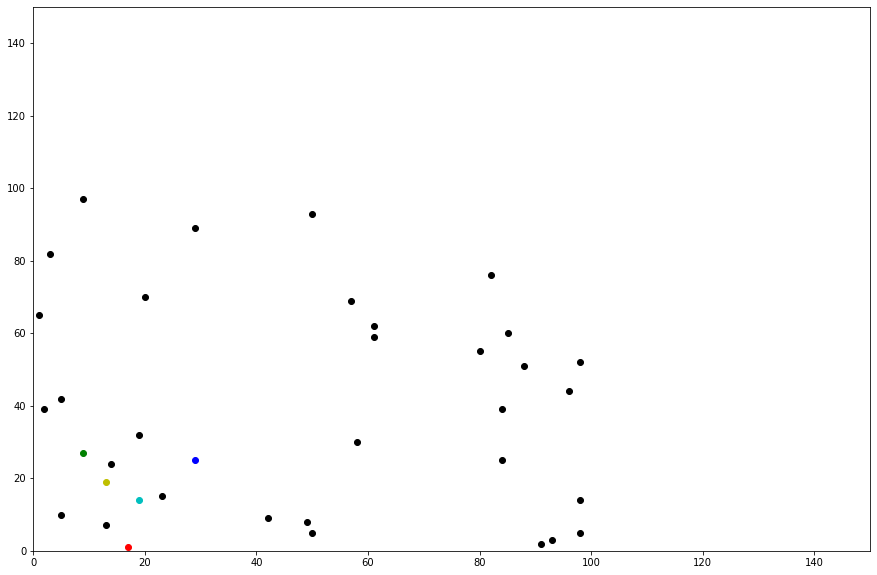

In [150]:
# CLUSTERING DE LA DATA 

import matplotlib.pyplot as plt
%matplotlib inline


k = vehiculos

centroide = {
    
    i+1: [np.random.randint(0,nodos) , np.random.randint(0,nodos)]
    for i in range(k)
    
}

fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'] , df['y'] , color='k')
colmap = {1 : 'c' , 2 : 'g' , 3: 'b' , 4 : 'y' , 5 : 'r'}

for i in centroide.keys():
    plt.scatter(*centroide[i] , color=colmap[i])
    
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()




    
    


     x   y  demanda  distancia_desde_1  distancia_desde_2  distancia_desde_3  \
0   82  76        0          88.391176          87.920419          73.552702   
1   96  44       19          82.637764          88.645361          69.641941   
2   50   5       21          32.280025          46.529560          29.000000   
3   49   8        6          30.594117          44.283180          26.248809   
4   13   7       19           9.219544          20.396078          24.083189   
5   29  89        7          75.663730          65.145990          64.000000   
6   58  30       12          42.154478          49.091751          29.427878   
7   84  39       16          69.641941          75.953933          56.753854   
8   14  24        6          11.180340           5.830952          15.033296   
9    2  39       16          30.232433          13.892444          30.413813   
10   3  82        8          69.856997          55.326305          62.649820   
11   5  10       14          14.560220  

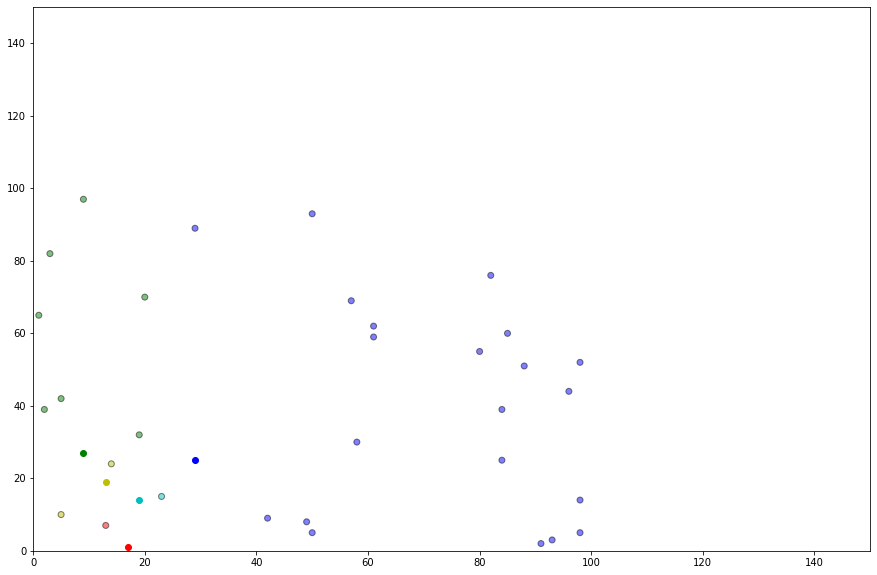

In [158]:
def asignar_centroide(df , centroide):
    for i in centroide.keys():
        df['distancia_desde_{}'.format(i)] = (
            
           # np.hypot(df['x'] - centroide[i][0] , df['y'] - centroide[i][1])
            np.sqrt( (df['x'] - centroide[i][0])**2 + (df['y'] - centroide[i][1])**2 )
        )
                
    distancia_centroide = ['distancia_desde_{}'.format(i) for i in centroide.keys()]
    df['cercania'] = df.loc[: , distancia_centroide].idxmin(axis=1)
    df['cercania'] = df['cercania'].map(lambda x : int(x.lstrip('distancia_desde_')))
    df['color'] = df['cercania'].map(lambda x : colmap[x])    
    return df


df = asignar_centroide(df , centroide)
print(df)
print("\n")
print("\n")



print("AHORA GRAFICANDO LOS PUNTOS RELACIONADOS (CERCANIA) CON EL CENTROIDE ")
fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])
    
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()


        

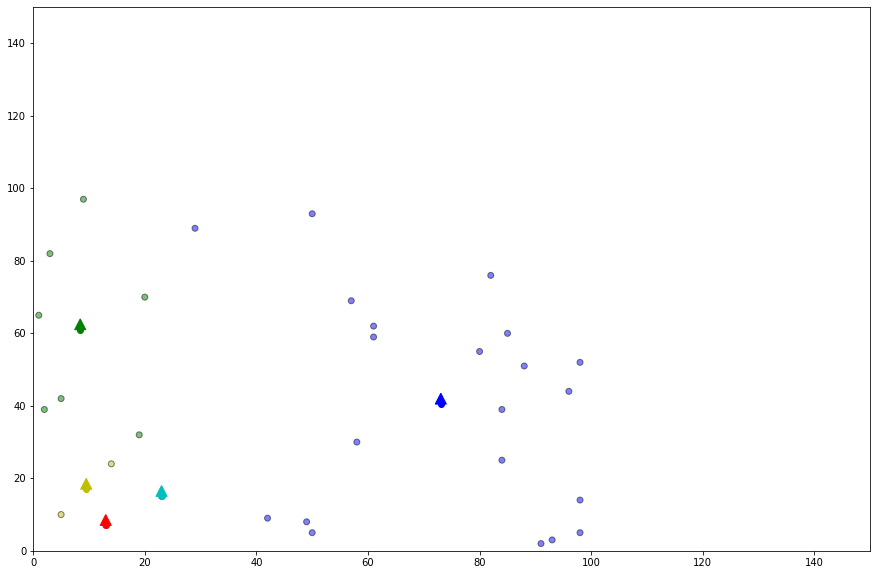

In [160]:
# CAMBIANDO EL CENTROIDE 

import copy

centroide_anterior = copy.deepcopy(centroide)

def update(k):
    for i in centroide.keys():
        centroide[i][0]  = np.mean(df[df['cercania'] == i]['x'])
        centroide[i][1]  = np.mean(df[df['cercania'] == i]['y'])

    return k 
    
centroide = update(centroide)

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] ,color = colmap[i])
plt.xlim(0,150)
plt.ylim(0,150)

for i in centroide.keys():
    old_x = centroide_anterior[i][0]
    old_y = centroide_anterior[i][1]
    dx = (centroide[i][0] - centroide_anterior[i][0]) * 0.75
    dy = (centroide[i][1] - centroide_anterior[i][1]) * 0.75
    ax.arrow(old_x , old_y , dx , dy , head_width = 2 , head_length=3 , fc=colmap[i], ec=colmap[i])
    
    
plt.show()






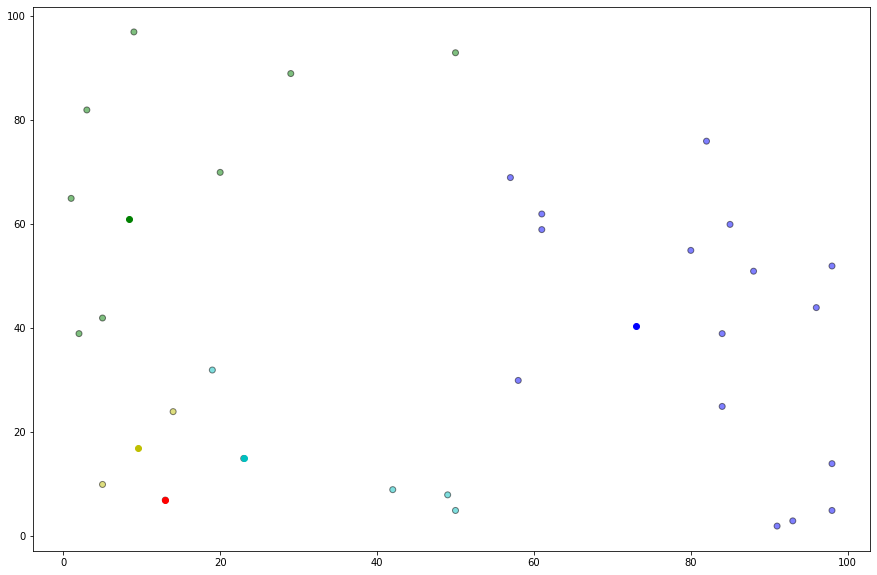

In [162]:
# REPETIR SELECCION DE CENTROIDE

df = asignar_centroide(df , centroide)


#RESULTADO DE LA NUEVA ELECCION 

fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])


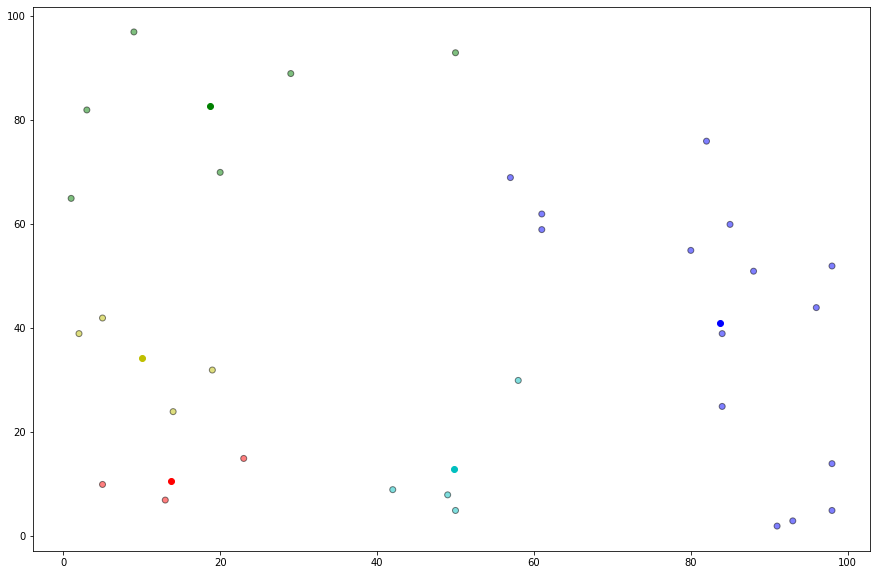

In [164]:
#CONTINUA MIENTRAS TODAS LAS ASIGNACIONES NO CAMBIEN MÁS

while True:
    centroide_cercano = df['cercania'].copy(deep=True)
    centroide = update(centroide)
    df = asignar_centroide(df , centroide)
    if centroide_cercano.equals(df['cercania']):
        break

        
fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])   
